[ref](https://jamtrading.jp/blogs/jam/1024509/)

# Import

In [18]:
import re
import sys

sys.path.append("../")
import json
import warnings
from string import Template
from time import sleep

import matplotlib.pyplot as plt
import pandas as pd
import requests
from tqdm import tqdm

from vook_db_lambda.config import MAX_PAGE, REQ_URL, WANT_ITEMS_RAKUTEN, req_params

In [2]:
import matplotlib

print(matplotlib.matplotlib_fname())

/Users/ozawaatsushi/.matplotlib/matplotlibrc


In [3]:
band_list = [
    "ローリングストーンズ",
    "ジミヘン",
    "レッド ツェッペリン",
    "デヴィッドボウイ",
    "METALLICA",
    "Guns N’ Roses",
    "KISS",
    "アイアンメイデン",
    "スレイヤー",
    "ランシド",
    "セックスピストルズ",
    "RAMONES",
    "ミスフィッツ",
    "the casualties",
    "ニルヴァーナ",
    "カートコバーン",
    "The velvet underground",
    "pearl jam",
    "foo fighters",
    "スリップノット",
    "Korn",
    "Rage Against the Machine",
    "Linkin Park",
    "Deftones",
    "PINK FLOYD",
    "JOURNEY",
]

item = "Tシャツ"
req_params["minPrice"] = 10000
MAX_PAGE = 100
not_200_msg = Template("ErrorCode -> $res_code\nError -> $res['error']\nPage -> $cnt")
not_hit_msg = "返ってきた商品数の数が0なので、ループ終了"
max_page_msg = "MAX PAGEに到達したので、ループ終了"

In [4]:
def loop_request(
    req_params: dict,
    cnt: int,
    df: pd.DataFrame,
    REQ_URL: str = REQ_URL,
    not_200_msg: str = not_200_msg,
    not_hit_msg: str = not_hit_msg,
    max_page_msg: str = max_page_msg,
) -> pd.DataFrame:
    while True:
        req_params["page"] = cnt
        res = requests.get(REQ_URL, req_params)
        res_code = res.status_code
        res = json.loads(res.text)
        d_template = {"res_code": res_code, "res": res, "cnt": cnt}
        if res_code != 200:
            print(not_200_msg.safe_substitute(d_template))
            break
        else:
            if res["hits"] == 0:
                print(not_hit_msg)
                break
            tmp_df = pd.DataFrame(res["Items"])[WANT_ITEMS_RAKUTEN]
            df = pd.concat([df, tmp_df], ignore_index=True)
        if cnt == MAX_PAGE:
            print(max_page_msg)
            break
        cnt += 1
        # リクエスト制限回避
        sleep(1)
    return df

In [5]:
l_df_main = []
for band_name in tqdm(band_list):
    print("1:settings")
    cnt = 1
    keyword = " ".join([item, band_name])
    req_params["page"] = cnt
    req_params["keyword"] = keyword
    print(f"keyword:{keyword}")
    print("2:loop request")
    df = pd.DataFrame(columns=WANT_ITEMS_RAKUTEN)
    df = loop_request(req_params, cnt, df)
    print("3:postprocess")
    df_main = df.rename(
        columns={"itemName": "name", "itemPrice": "price", "itemUrl": "url"}
    )
    df_main["band_name"] = band_name
    l_df_main.append(df_main)
df_main_all = pd.concat(l_df_main, ignore_index=True)

  0%|                                                                                                                             | 0/26 [00:00<?, ?it/s]

1:settings
keyword:Tシャツ ローリングストーンズ
2:loop request


  4%|████▌                                                                                                                | 1/26 [00:08<03:25,  8.20s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ジミヘン
2:loop request


  8%|█████████                                                                                                            | 2/26 [00:09<01:38,  4.09s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ レッド ツェッペリン
2:loop request


 12%|█████████████▌                                                                                                       | 3/26 [00:10<01:03,  2.77s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ デヴィッドボウイ
2:loop request


 15%|██████████████████                                                                                                   | 4/26 [00:11<00:47,  2.15s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ METALLICA
2:loop request


 19%|██████████████████████▌                                                                                              | 5/26 [00:16<01:03,  3.03s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Guns N’ Roses
2:loop request


 23%|███████████████████████████                                                                                          | 6/26 [00:18<00:55,  2.79s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ KISS
2:loop request


 27%|███████████████████████████████▌                                                                                     | 7/26 [00:26<01:25,  4.48s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ アイアンメイデン
2:loop request


 31%|████████████████████████████████████                                                                                 | 8/26 [00:29<01:08,  3.79s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ スレイヤー
2:loop request


 35%|████████████████████████████████████████▌                                                                            | 9/26 [00:40<01:45,  6.19s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ランシド
2:loop request


 38%|████████████████████████████████████████████▌                                                                       | 10/26 [00:41<01:14,  4.64s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ セックスピストルズ
2:loop request


 42%|█████████████████████████████████████████████████                                                                   | 11/26 [00:42<00:53,  3.59s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ RAMONES
2:loop request


 46%|█████████████████████████████████████████████████████▌                                                              | 12/26 [00:44<00:40,  2.86s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ミスフィッツ
2:loop request


 50%|██████████████████████████████████████████████████████████                                                          | 13/26 [00:45<00:30,  2.35s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ the casualties
2:loop request
返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ ニルヴァーナ
2:loop request


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 15/26 [00:49<00:25,  2.35s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ カートコバーン
2:loop request


 62%|███████████████████████████████████████████████████████████████████████▍                                            | 16/26 [00:54<00:29,  2.90s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ The velvet underground
2:loop request


 65%|███████████████████████████████████████████████████████████████████████████▊                                        | 17/26 [00:55<00:22,  2.45s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ pearl jam
2:loop request


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 18/26 [00:56<00:16,  2.11s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ foo fighters
2:loop request


 73%|████████████████████████████████████████████████████████████████████████████████████▊                               | 19/26 [00:58<00:12,  1.85s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ スリップノット
2:loop request


 77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 20/26 [01:00<00:11,  1.98s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Korn
2:loop request


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 21/26 [01:02<00:10,  2.08s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Rage Against the Machine
2:loop request


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 22/26 [01:03<00:07,  1.83s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Linkin Park
2:loop request


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 23/26 [01:05<00:04,  1.64s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ Deftones
2:loop request


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 24/26 [01:06<00:03,  1.51s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ PINK FLOYD
2:loop request


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 25/26 [01:10<00:02,  2.42s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess
1:settings
keyword:Tシャツ JOURNEY
2:loop request


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [01:13<00:00,  2.81s/it]

返ってきた商品数の数が0なので、ループ終了
3:postprocess


In [6]:
print("shape:", df_main_all.shape)

shape: (1455, 4)


In [7]:
s = df_main_all.groupby("band_name").nunique()["name"]
print(
    "バンド別商品数:",
    s.sort_values(ascending=False),
)

バンド別商品数: band_name
スレイヤー                       229
KISS                        181
ローリングストーンズ                  176
METALLICA                   103
PINK FLOYD                   99
ニルヴァーナ                       98
カートコバーン                      96
JOURNEY                      38
スリップノット                      36
アイアンメイデン                     35
Guns N’ Roses                34
ミスフィッツ                       30
pearl jam                    27
Korn                         27
レッド ツェッペリン                   26
RAMONES                      20
デヴィッドボウイ                     20
Rage Against the Machine     19
ジミヘン                         15
セックスピストルズ                    13
Linkin Park                   3
foo fighters                  2
The velvet underground        2
ランシド                          1
Deftones                      1
Name: name, dtype: int64


In [8]:
df_product_num_per_band_name = s.reset_index()
sample_size = 30
band_list_over_sample_size = df_product_num_per_band_name[
    df_product_num_per_band_name["name"] > sample_size
]["band_name"].tolist()
print("十分なサンプルサイズを持つバンド名", band_list_over_sample_size)

十分なサンプルサイズを持つバンド名 ['Guns N’ Roses', 'JOURNEY', 'KISS', 'METALLICA', 'PINK FLOYD', 'アイアンメイデン', 'カートコバーン', 'スリップノット', 'スレイヤー', 'ニルヴァーナ', 'ローリングストーンズ']


In [9]:
df_main_filtered = df_main_all[
    df_main_all["band_name"].isin(band_list_over_sample_size)
].reset_index(drop=True)
df_main_filtered

,name,price,url,band_name
0,"90's ROLLING STONES USA製 ""3 Ball Charlie"" ロックバ...",107800,https://hb.afl.rakuten.co.jp/hgc/g00taeee.brn1...,ローリングストーンズ
1,"【中古】70's The Rolling Stones/ローリング・ストーンズ ""Tour ...",87780,https://hb.afl.rakuten.co.jp/hgc/g00tzn6e.brn1...,ローリングストーンズ
2,DEADSTOCK 90s USA製 ヴィンテージ ローリングストーンズ The Rolli...,84800,https://hb.afl.rakuten.co.jp/hgc/g00rgike.brn1...,ローリングストーンズ
3,DEADSTOCK 90s USA製 ヴィンテージ ローリングストーンズ The Rolli...,84800,https://hb.afl.rakuten.co.jp/hgc/g00rgike.brn1...,ローリングストーンズ
4,COMMEdesGARCONS コムデギャルソン xVersaceヴェルサーチェ【21年製】...,83600,https://hb.afl.rakuten.co.jp/hgc/g00s68be.brn1...,ローリングストーンズ
...,...,...,...,...
1238,【中古】80s/journey/ラグラン7分袖カットソー/GRY/プリント【メンズウェア】,10890,https://hb.afl.rakuten.co.jp/hgc/g00r3cee.brn1...,JOURNEY
1239,【中古】Journey_1982s_MUSIC-T Tシャツ/M/コットン/GRY【メンズウェア】,10890,https://hb.afl.rakuten.co.jp/hgc/g00r3cee.brn1...,JOURNEY
1240,"(取寄) アイベックス ジャーニー T-シャツ - メリノ ウール, ショート スリーブ I...",10390,https://hb.afl.rakuten.co.jp/hgc/g00qwfoe.brn1...,JOURNEY
1241,"(取寄) アイベックス ジャーニー シャツ - メリノ ウール, ショート スリーブ Ibe...",10390,https://hb.afl.rakuten.co.jp/hgc/g00rhtxe.brn1...,JOURNEY


In [10]:
df_main_filtered.to_csv(
    "../data/output/rakuten_bandTshirts_prices/output.csv", index=False
)

# PostProcess

In [54]:
df = pd.read_csv("../data/output/rakuten_bandTshirts_prices/output.csv")

In [55]:
# 表記揺れ対応用の辞書を作成
band_aliases = {
    "ローリングストーンズ": [
        "ローリング・ストーンズ",
        "rolling stones",
        "ROLLING STONE",
        "ローリングストーン",
    ],
    "ジミヘン": ["ジミ・ヘンドリックス", "jimi hendrix"],
    "METALLICA": ["メタリカ"],
    "Guns N’ Roses": [
        "Guns N' Roses",
        "ガンズ・アンド・ローゼズ",
        "Guns n Roses",
        "Guns N’Roses",
        "GUN'S & ROSES",
        "ガンズ＆ローゼス",
    ],
    "KISS": [],
    "アイアンメイデン": ["アイアン・メイデン", "アイアン メイデン", "IRON MAIDEN"],
    "スレイヤー": ["Slayer"],
    "ニルヴァーナ": ["ニルバーナ", "NIRVANA"],
    "カートコバーン": ["カート・コバーン", "Kurt Cobain", "カ-トコバーン"],
    "スリップノット": ["slipknot", "SlipKnot", "SLIPKNOT", "Slipknot"],
    "PINK FLOYD": ["PINKFLOYD", "pinkfloyd"],
    "JOURNEY": [],
}
# コラボブランド対応用
other_brand_list = [
    "COMMEdesGARCONS",
    "コムデギャルソン",
    "CHROME HEARTS",
    "クロムハーツ",
    "Supreme",
    "シュプリーム",
    "TMT",
    "Paul Smith",
    "glamb",
    "Adam et Rope",
    "HYSTERIC GLAMOUR",
    "XXX",
    "Sadistic Action",
    "MINEDENIM",
    "クリスチャンディオール",
    "HALFMAN",
]


# 関数を定義してバンド名を含むレコードを検出
def is_valid_record(band_name, product_name, band_aliases):
    if band_name not in band_aliases:
        return False
    aliases = [band_name] + band_aliases[band_name]
    pattern = r"(" + "|".join(re.escape(alias) for alias in aliases) + r")"

    # Check if product_name contains any of the other brands
    other_brand_pattern = (
        r"(" + "|".join(re.escape(brand) for brand in other_brand_list) + r")"
    )
    if re.search(other_brand_pattern, product_name, re.IGNORECASE):
        return False

    return bool(re.search(pattern, product_name, re.IGNORECASE))


# 不正なレコードの検出
df["is_valid"] = df.apply(
    lambda row: is_valid_record(row["band_name"], row["name"], band_aliases),
    axis=1,
)
invalid_records = df[~df["is_valid"]]
valid_records = df[df["is_valid"]]

In [56]:
# TODO:アーティスト単体
df_kurt_cobain = valid_records[valid_records["band_name"] == "カートコバーン"].copy()
df_not_kurt_cobain = valid_records[
    valid_records["band_name"] != "カートコバーン"
].copy()
df_kurt_cobain["band_name"] = "ニルヴァーナ"
valid_records_after = pd.concat([df_not_kurt_cobain, df_kurt_cobain], ignore_index=True)

In [57]:
print(f"{df.shape[0] - valid_records_after.shape[0]}のレコードが削減されました。")

218のレコードが削減されました。


In [62]:
s = valid_records_after.groupby("band_name")["price"].median()
print(
    "バンド別商品数:",
    s.sort_values(ascending=False),
)

バンド別商品数: band_name
ニルヴァーナ           39500.0
METALLICA        22550.0
Guns N’ Roses    19800.0
アイアンメイデン         17380.0
KISS             17100.0
ローリングストーンズ       16390.0
PINK FLOYD       16200.0
スリップノット          13970.0
スレイヤー            13915.0
JOURNEY          11924.5
Name: price, dtype: float64


ローリングストーンズ：商品数：176


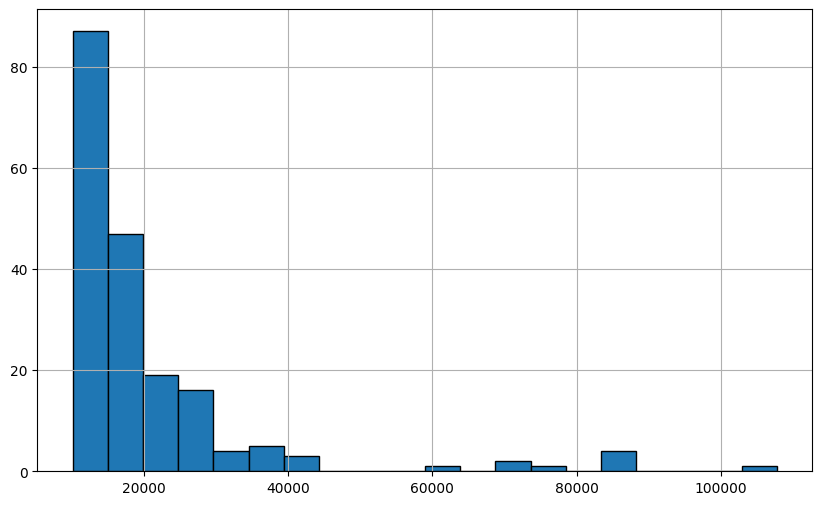

METALLICA：商品数：103


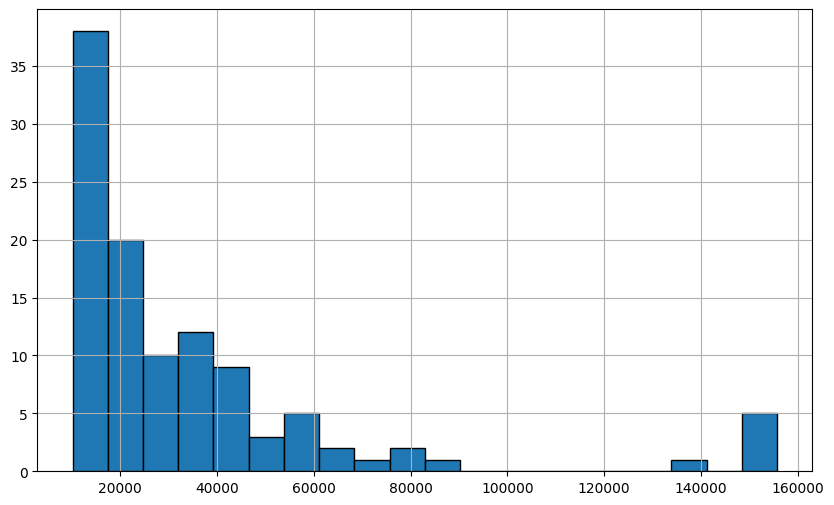

Guns N’ Roses：商品数：34


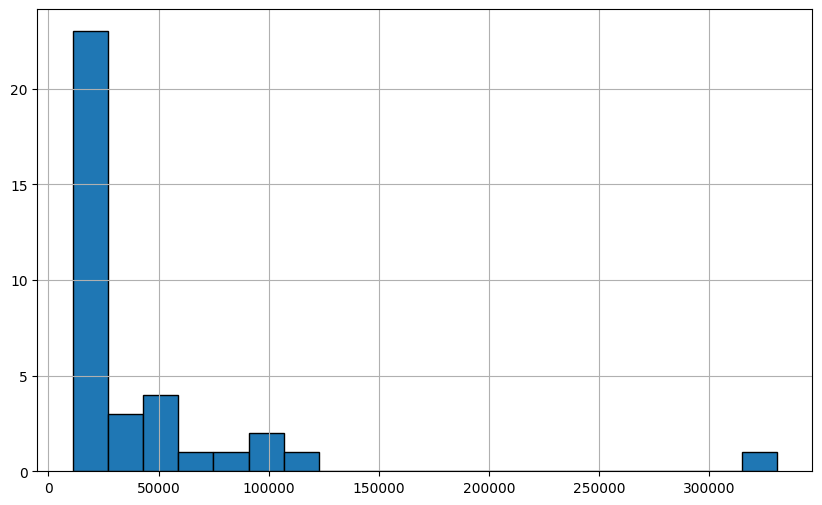

KISS：商品数：181


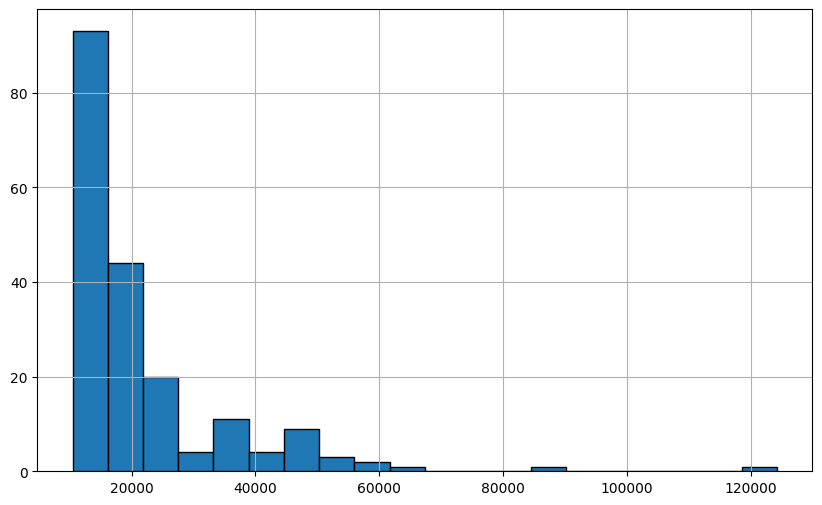

アイアンメイデン：商品数：35


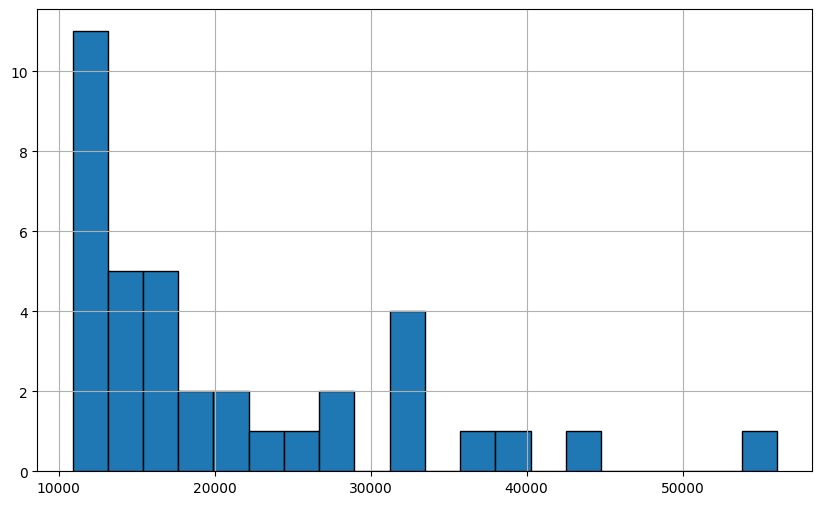

スレイヤー：商品数：229


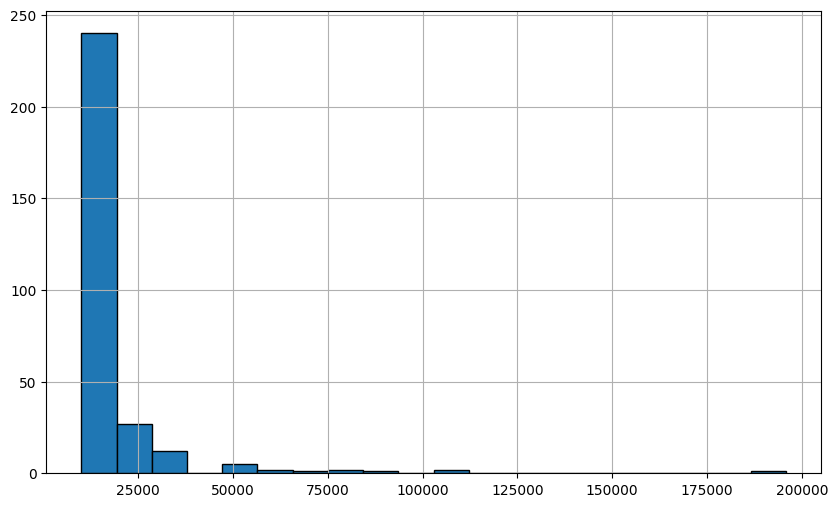

ニルヴァーナ：商品数：98


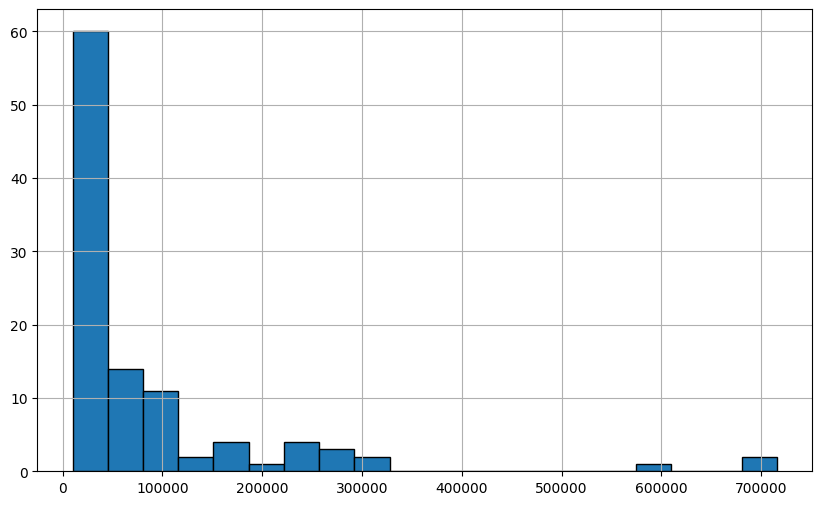

カートコバーン：商品数：96


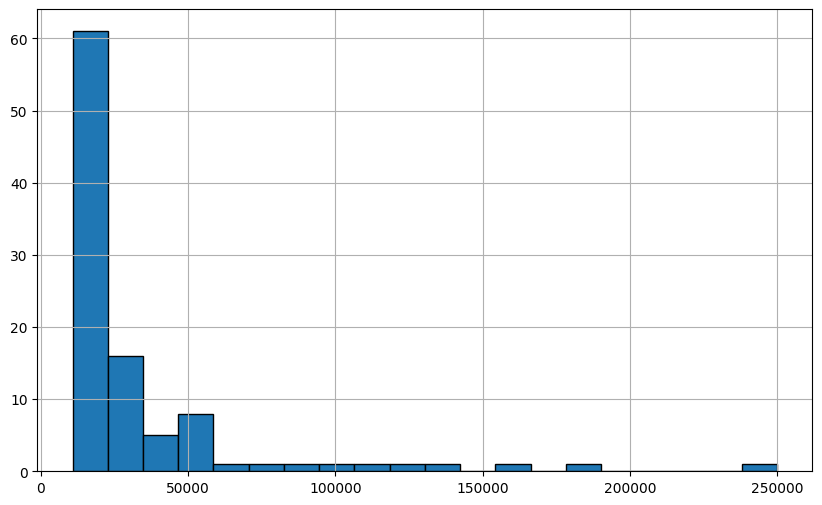

スリップノット：商品数：36


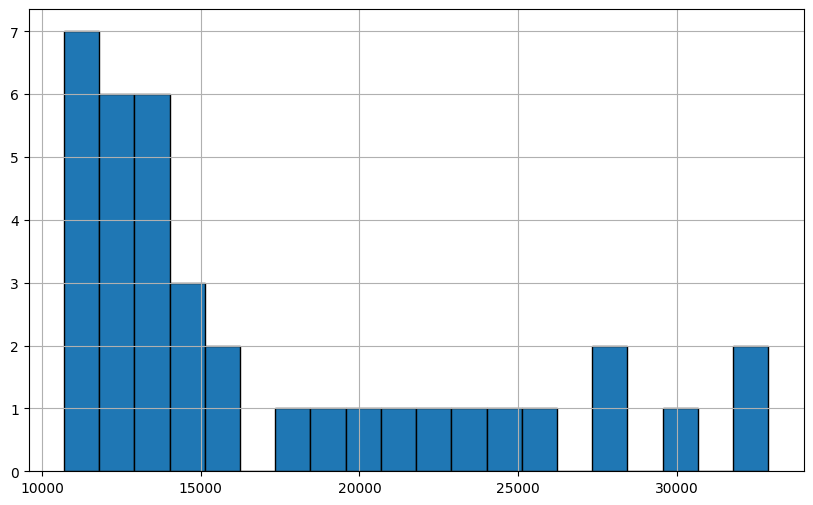

PINK FLOYD：商品数：99


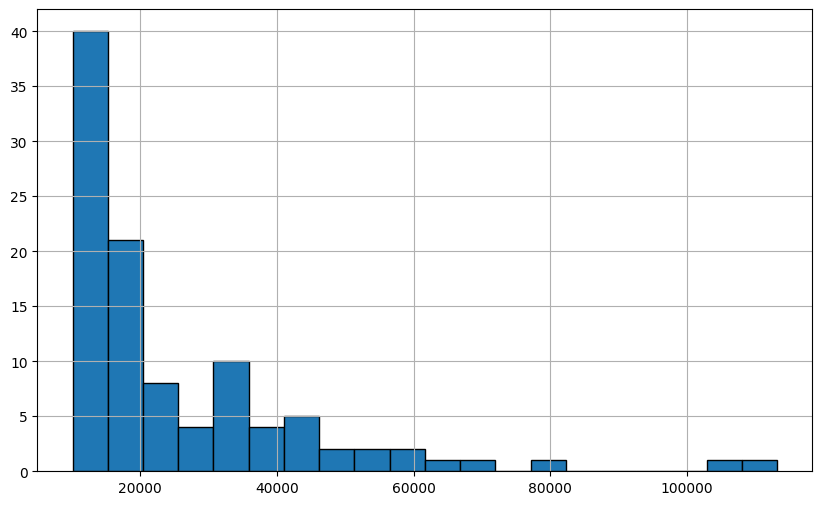

JOURNEY：商品数：38


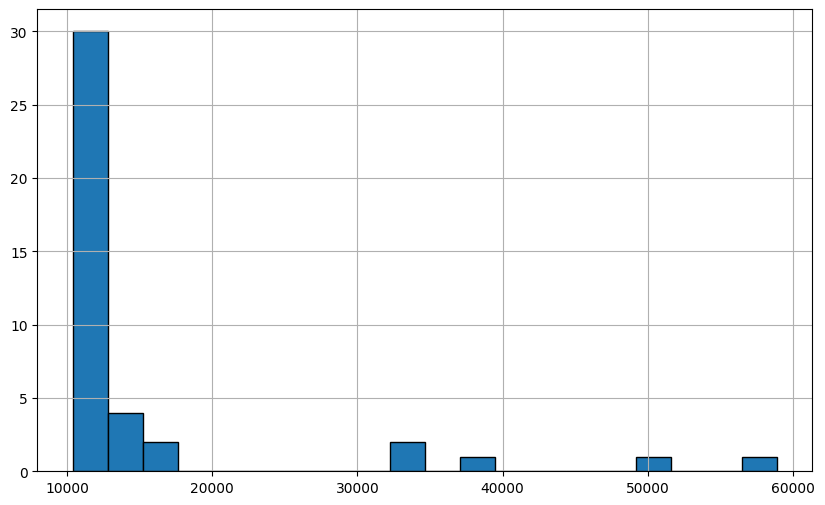

In [13]:
# バンドごとに価格帯の分布をプロット
bands = valid_records_after["band_name"].unique()
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    for band in bands:
        print(
            f"{band}：商品数：{valid_records_after[valid_records_after['band_name'] == band]['name'].nunique()}"
        )
        band_data = valid_records_after[valid_records_after["band_name"] == band]
        plt.figure(figsize=(10, 6))
        plt.hist(band_data["price"], bins=20, edgecolor="black")
        plt.grid(True)
        plt.show()

In [63]:
print(
    "バンド別平均価格:",
    valid_records_after.groupby("band_name")["price"]
    .mean()
    .sort_values(ascending=False),
)

バンド別平均価格: band_name
ニルヴァーナ           78202.777778
Guns N’ Roses    39857.571429
METALLICA        34765.724771
PINK FLOYD       25476.912621
KISS             23025.890244
アイアンメイデン         21073.216216
ローリングストーンズ       20455.099415
スレイヤー            18823.541237
スリップノット          16978.918919
JOURNEY          15478.100000
Name: price, dtype: float64


In [64]:
print(
    "バンド別平均価格:",
    valid_records_after.groupby("band_name")["price"]
    .median()
    .sort_values(ascending=False),
)

バンド別平均価格: band_name
ニルヴァーナ           39500.0
METALLICA        22550.0
Guns N’ Roses    19800.0
アイアンメイデン         17380.0
KISS             17100.0
ローリングストーンズ       16390.0
PINK FLOYD       16200.0
スリップノット          13970.0
スレイヤー            13915.0
JOURNEY          11924.5
Name: price, dtype: float64
